# Forest Plot

> Explanation of how to use forest_plot for contrast objects e.g delta-delta and mini-meta.

- order: 4

Version 20xx.xx.xx, DABEST now supports the comparison of different delta-delta or mini-meta analyses through a function called "forest_plot". 

As beautiful as a dabest plot is, sometimes we want to alter its appearance, be it to change the position of the legend, use different texts in the legend or the axis labels, to add or remove lines etc, or to change the color and alpha of some particular graphical elements. The rationale of using forest_plot is that we might want to move parts of the plot, especially the bootstrapped half violins onto a different axes for a meta-analysis, be it delta-delta or mini-meta.

This tutorial notebook investigates how to conduct a meta-analysis with a forest plot of delta-delta / mini-meta bootstrapped half violins.

- Many experimental designs investigate the effects of two interacting independent variables on a dependent variable. The delta-delta effect size enables us to distill the net effect of the two variables. 

- Consider 3 experiments where in each of the experiment we test the efficacy of 3 drugs named ``Drug1``, ``Drug2`` , and ``Drug3`` on a disease-causing mutation M based on disease metric Y. The greater the value Y has, the more severe the disease phenotype is. Phenotype Y has been shown to be caused by a gain-of-function mutation M, so we expect a difference between wild type (W) subjects and mutant subjects (M). Now, we want to know whether this effect is ameliorated by the administration of Drug treatment. We also administer a placebo as a control. In theory, we only expect Drug to have an effect on the M group, although in practice, many drugs have non-specific effects on healthy populations too.

- Throughout the tutorial, we will be exploring with a simulated dataset.

|       | Wildtype | Mutant   |
|-------|---------|----------|
| Drug1  | X<sub>D, W</sub> | X<sub>D, M</sub> |
| Placebo | X<sub>P, W</sub> | X<sub>P, M</sub> |

|       | Wildtype | Mutant   |
|-------|---------|----------|
| Drug2  | X<sub>D, W</sub> | X<sub>D, M</sub> |
| Placebo | X<sub>P, W</sub> | X<sub>P, M</sub> |

|       | Wildtype | Mutant   |
|-------|---------|----------|
| Drug3  | X<sub>D, W</sub> | X<sub>D, M</sub> |
| Placebo | X<sub>P, W</sub> | X<sub>P, M</sub> |

There are two ``Treatment`` conditions, ``Placebo`` (control group) and ``Drug`` (test group). There are two ``Genotype``\s: ``W`` (wild type population) and ``M`` (mutant population). Additionally, each experiment was conducted twice (``Rep1`` and ``Rep2``). We will perform several analyses to visualise these differences in a simulated dataset. 

## Load libraries

In [ ]:
import numpy as np
import pandas as pd
import dabest
from dabest.forest_plot import forest_plot
import scipy as sp
import matplotlib as mpl
import matplotlib.pyplot as plt
# %matplotlib inline
import seaborn as sns
import dabest 
print("We're using DABEST v{}".format(dabest.__version__))

We're using DABEST v2024.03.29


## Simulate datasets for the contrast objects

In [ ]:

from scipy.stats import norm

def create_delta_dataset(N=20, 
                        seed=9999, 
                        second_quarter_adjustment=3, 
                        third_quarter_adjustment=-0.1):
    np.random.seed(seed)  # Set the seed for reproducibility

    # Create samples
    y = norm.rvs(loc=3, scale=0.4, size=N*4)
    y[N:2*N] += second_quarter_adjustment
    y[2*N:3*N] += third_quarter_adjustment

    # Treatment, Rep, Genotype, and ID columns
    treatment = np.repeat(['Placebo', 'Drug'], N*2).tolist()
    rep = ['Rep1', 'Rep2'] * (N*2)
    genotype = np.repeat(['W', 'M', 'W', 'M'], N).tolist()
    id_col = list(range(0, N*2)) * 2

    # Combine all columns into a DataFrame
    df = pd.DataFrame({
        'ID': id_col,
        'Rep': rep,
        'Genotype': genotype,
        'Treatment': treatment,
        'Y': y
    })

    return df

# Generate the first dataset with a different seed and adjustments
df_delta2_drug1 = create_delta_dataset(seed=9999, second_quarter_adjustment=1, third_quarter_adjustment=-0.5)

# Generate the second dataset with a different seed and adjustments
df_delta2_drug2 = create_delta_dataset(seed=9999, second_quarter_adjustment=0.1, third_quarter_adjustment=-1)

# Generate the third dataset with the same seed as the first but different adjustments
df_delta2_drug3 = create_delta_dataset(seed=9999, second_quarter_adjustment=3, third_quarter_adjustment=-0.1)

### Creating contrast objects required for forest_plot

In [ ]:
unpaired_delta_01 = dabest.load(data = df_delta2_drug1, 
                                x = ["Genotype", "Genotype"], 
                                y = "Y", delta2 = True, 
                                experiment = "Treatment")
unpaired_delta_02 = dabest.load(data = df_delta2_drug2, 
                                x = ["Genotype", "Genotype"], 
                                y = "Y", delta2 = True, 
                                experiment = "Treatment")
unpaired_delta_03 = dabest.load(data = df_delta2_drug3, 
                                x = ["Genotype", "Genotype"], 
                                y = "Y", 
                                delta2 = True, 
                                experiment = "Treatment")
contrasts = [unpaired_delta_01, unpaired_delta_02, unpaired_delta_03]

/Users/wangzhuoyulucas/anaconda3/envs/dabest/lib/python3.10/site-packages/dabest/_dabest_object.py:668: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  plot_data.loc[:, self.__xvar] = pd.Categorical(
/Users/wangzhuoyulucas/anaconda3/envs/dabest/lib/python3.10/site-packages/dabest/_dabest_object.py:668: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  plot_data.loc[:, self.__xvar] = pd.Categorical(
/Users/wangzhuoyulucas/anaconda3/envs/dabest/lib/python3.10/site-packages/dabest/_dabest_object.py:668: FutureWarning: In a future version, `df.iloc[:, i] = new

## Visualize the delta-delta plots for each datasets 

To create a delta-delta plot, you simply need to set ``delta2=True`` in the 
``dabest.load()`` function and ``mean_diff.plot()``

/Users/wangzhuoyulucas/anaconda3/envs/dabest/lib/python3.10/site-packages/dabest/plot_tools.py:1232: UserWarning: 20.0% of the points cannot be placed. You might want to decrease the size of the markers.
  warnings.warn(err)
/Users/wangzhuoyulucas/anaconda3/envs/dabest/lib/python3.10/site-packages/dabest/plot_tools.py:1232: UserWarning: 20.0% of the points cannot be placed. You might want to decrease the size of the markers.
  warnings.warn(err)
/Users/wangzhuoyulucas/anaconda3/envs/dabest/lib/python3.10/site-packages/dabest/plot_tools.py:1232: UserWarning: 25.0% of the points cannot be placed. You might want to decrease the size of the markers.
  warnings.warn(err)
/Users/wangzhuoyulucas/anaconda3/envs/dabest/lib/python3.10/site-packages/dabest/plot_tools.py:1232: UserWarning: 35.0% of the points cannot be placed. You might want to decrease the size of the markers.
  warnings.warn(err)
/Users/wangzhuoyulucas/anaconda3/envs/dabest/lib/python3.10/site-packages/dabest/plot_tools.py:1232:

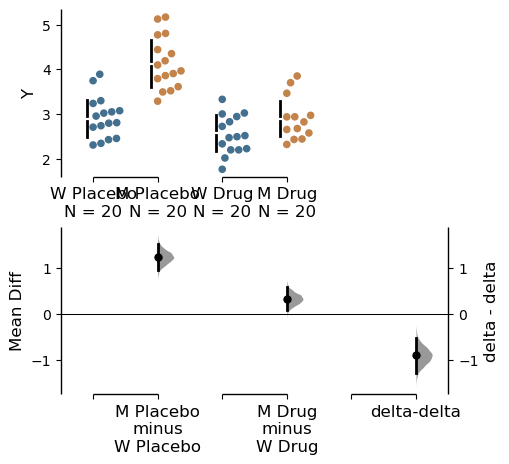

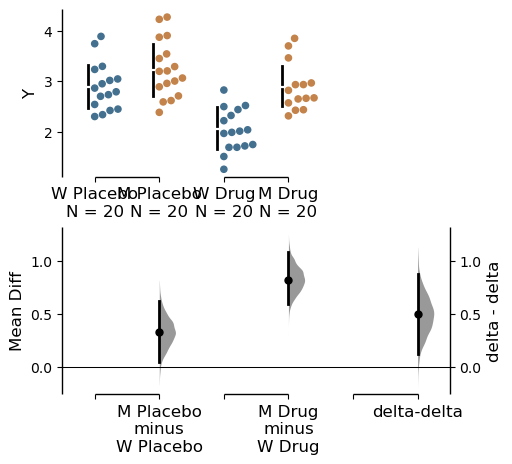

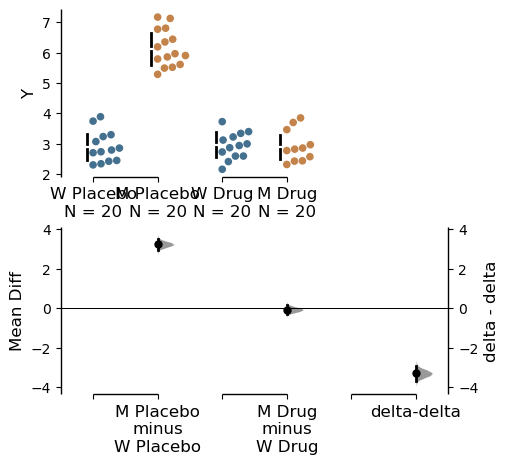

In [ ]:
''' 
In this case,``x`` needs to be declared as a list consisting of 2 elements, unlike most cases where it is a single element. 
The first element in ``x`` will represent the variable plotted along the horizontal axis, and the second one will determine the 
color of dots for scattered plots or the color of lines for slope graphs. We use the ``experiment`` input to specify the grouping of the data.
'''
f1 = unpaired_delta_01.mean_diff.plot(
    contrast_label='Mean Diff',
    fig_size = (5, 5),
    raw_marker_size = 5,
    es_marker_size = 5,
    color_col='Genotype'
);


f2 = unpaired_delta_02.mean_diff.plot(                  
            contrast_label='Mean Diff',
            fig_size = (5, 5),
            raw_marker_size = 5,
            es_marker_size = 5,
            color_col='Genotype'
);


f3 = unpaired_delta_03.mean_diff.plot(                  
                    contrast_label='Mean Diff',
                    fig_size = (5, 5),
                    raw_marker_size = 5,
                    es_marker_size = 5,
                    color_col='Genotype'
);




# Plot all the delta-delta plots into a forest plot 
### For comparisons of different ``Drug`` effects

Key Parameters:

- ``contrasts``: A list of contrast objects 

- ``contrast_type``: Select between ``"delta2"`` (for delta-delta) or ``"mini_meta"`` for mini-meta 

- ``contrast_labels``: A list of labels for the contrast objects. E.g., ``['Drug1', 'Drug2', 'Drug3']``

- ``effect_size``: Select the effect size metric from ``"mean_diff", "median_diff", "cliffs_delta", "cohens_d", "hedges_g", or "delta_g"``. The default is ``"mean_diff"``

- ``ylabel``: The axis label of dependent variable (Y-axis for vertical layout, X-axis for horizontal layout). The default is ``"value"``

- ``title``: The plot title. The default is ``"ΔΔ Forest"``

- ``ax``: Specify a matplotlib axes to put the plot into existing figures 

- ``horizontal``: A boolean input (``True``/ ``False``) to adjust the plot orientation. The default is vertical orientation (``False``) 

- ``custom_palette``: A list or dictionary of colors, one for each contrast object. E.g., ``['gray', 'blue', 'green']`` or ``{'Drug1':'gray', 'Drug2':'blue', 'Drug3':'green'}``

- Additional kwargs are supported such as ``violin_kwargs``, ``fontsize``, ``marker_size``, ``ci_line_width``, ``rotation_for_xlabels``, ``alpha_violin_plot``, ``remove_spines``, ``desat_violin``, and ``additional_plotting_kwargs``


#### Vertical Layout (default)

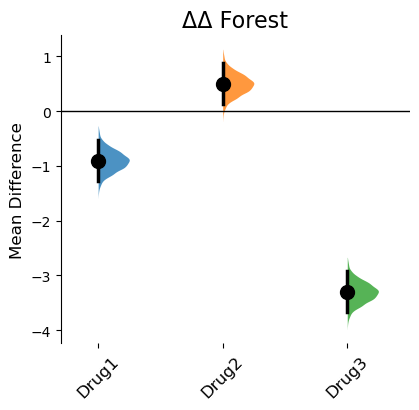

In [ ]:
forest1_vertical = forest_plot(contrasts, 
                               contrast_labels =['Drug1', 'Drug2', 'Drug3']);

#### Horizontal Layout

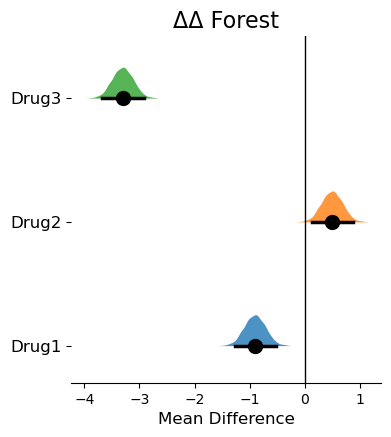

In [ ]:
forest1_horizontal = forest_plot(contrasts, 
                                 contrast_labels =['Drug1', 'Drug2', 'Drug3'],
                                 horizontal=True);


#### Changing ``custom_palette`` and ``effect_size``

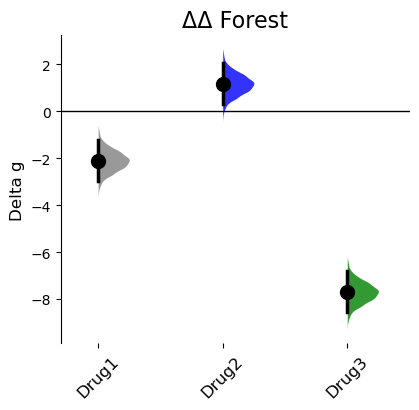

In [ ]:
forest2_vertical = forest_plot(contrasts, 
                               contrast_labels =['Drug1', 'Drug2', 'Drug3'], 
                               custom_palette= ['gray', 'blue', 'green'], 
                               # or {'Drug1':'gray', 'Drug2':'blue', 'Drug3':'green'}
                               effect_size='delta_g');

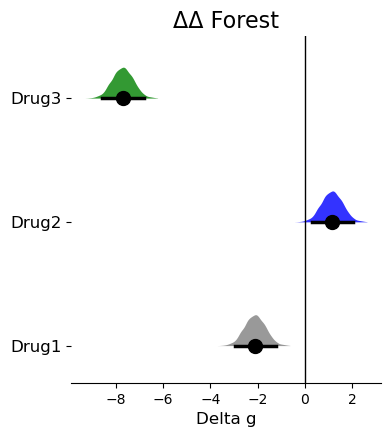

In [ ]:

forest2_horizontal = forest_plot(contrasts, 
                                 contrast_labels =['Drug1', 'Drug2', 'Drug3'], 
                                 custom_palette= ['gray', 'blue', 'green'],
                                 horizontal=True, effect_size='delta_g');




### A forest plot added as a subfigure with a figure with a variety of DABEST plots

/Users/wangzhuoyulucas/anaconda3/envs/dabest/lib/python3.10/site-packages/dabest/plot_tools.py:1232: UserWarning: 5.0% of the points cannot be placed. You might want to decrease the size of the markers.
  warnings.warn(err)
/Users/wangzhuoyulucas/anaconda3/envs/dabest/lib/python3.10/site-packages/dabest/plot_tools.py:1232: UserWarning: 5.0% of the points cannot be placed. You might want to decrease the size of the markers.
  warnings.warn(err)
/Users/wangzhuoyulucas/anaconda3/envs/dabest/lib/python3.10/site-packages/dabest/plot_tools.py:1232: UserWarning: 15.0% of the points cannot be placed. You might want to decrease the size of the markers.
  warnings.warn(err)


Text(0.0, 1.0, 'Forest plot')

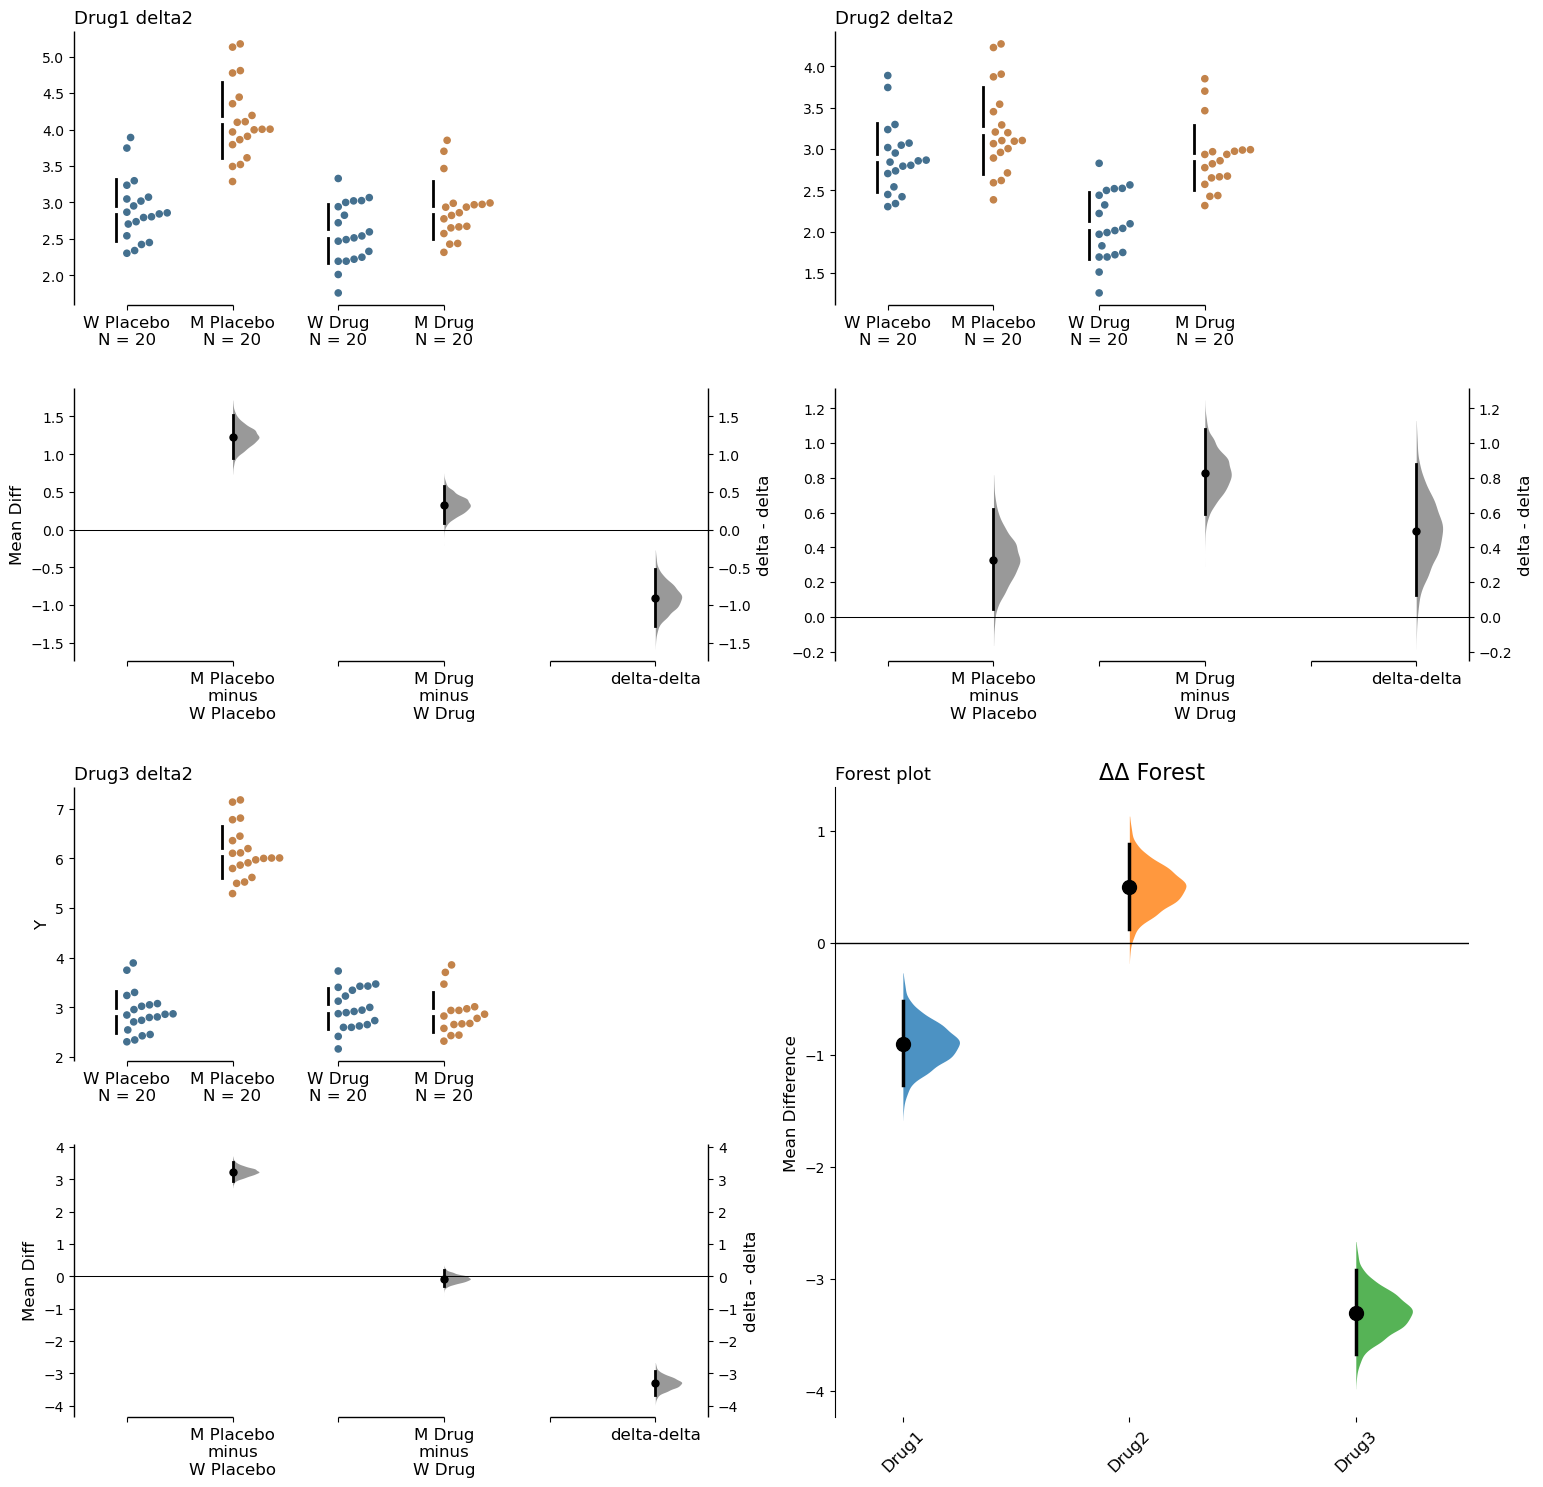

In [ ]:
f_forest_drug_profiles, axes  = plt.subplots(2, 2, figsize=[18, 18])
contrast_labels1 = ['Drug1', 'Drug2', 'Drug3']
unpaired_delta_01.mean_diff.plot(                  
                    contrast_label='Mean Diff',
                    fig_size = (5, 5),
                    raw_marker_size = 5,
                    es_marker_size = 5,
                    color_col='Genotype',
                    ax = axes[0,0]
)

unpaired_delta_02.mean_diff.plot(                  
            contrast_label='',
            fig_size = (5, 5),
            raw_marker_size = 5,
            es_marker_size = 5,
            color_col='Genotype',
            ax = axes[0,1]
)


unpaired_delta_03.mean_diff.plot(                  
                    contrast_label='Mean Diff',
                    fig_size = (5, 5),
                    raw_marker_size = 5,
                    es_marker_size = 5,
                    color_col='Genotype',
                    ax = axes[1,0]
)
forest_plot(contrasts, contrast_labels = contrast_labels1 , ax = axes[1,1])
axes[0,0].set_title('Drug1 delta2', fontsize = 13, loc='left')
axes[0,0].set_ylabel('')
axes[0,1].set_ylabel('')
axes[0,1].set_title('Drug2 delta2', fontsize = 13, loc='left')
axes[1,0].set_title('Drug3 delta2', fontsize = 13, loc='left')
axes[0,1].set_ylabel('')
axes[1,1].set_title('Forest plot', fontsize = 13, loc='left') 

## Forest plot of mini-meta:


### Simulate the datasets for unpaired mini_meta 

In [ ]:
def create_mini_meta_dataset(N=20, seed=9999, control_locs=[3, 3.5, 3.25], control_scales=[0.4, 0.75, 0.4], 
                             test_locs=[3.5, 2.5, 3], test_scales=[0.5, 0.6, 0.75]):
    np.random.seed(seed)  # Set the seed for reproducibility

    # Create samples for controls and tests
    controls_tests = []
    for loc, scale in zip(control_locs + test_locs, control_scales + test_scales):
        controls_tests.append(norm.rvs(loc=loc, scale=scale, size=N))

    # Add a `Gender` column for coloring the data
    gender = ['Female'] * (N // 2) + ['Male'] * (N // 2)

    # Add an `ID` column for paired data plotting
    id_col = list(range(1, N + 1))

    # Combine samples and gender into a DataFrame
    df_columns = {f'Control {i+1}': controls_tests[i] for i in range(len(control_locs))}
    df_columns.update({f'Test {i+1}': controls_tests[i + len(control_locs)] for i in range(len(test_locs))})
    df_columns['Gender'] = gender
    df_columns['ID'] = id_col

    df = pd.DataFrame(df_columns)

    return df

# Customizable dataset creation with different arguments
df_mini_meta01 = create_mini_meta_dataset(seed=9999, 
                                          control_locs=[3, 3.5, 3.25], 
                                          control_scales=[0.4, 0.75, 0.4], 
                                          test_locs=[3.5, 2.5, 3], 
                                          test_scales=[0.5, 0.6, 0.75])

df_mini_meta02 = create_mini_meta_dataset(seed=9999, 
                                          control_locs=[4, 2, 3.25], 
                                          control_scales=[0.3, 0.75, 0.45], 
                                          test_locs=[2, 1.5, 2.75], 
                                          test_scales=[0.5, 0.6, 0.4])

df_mini_meta03 = create_mini_meta_dataset(seed=9999, 
                                          control_locs=[6, 5.5, 4.25], 
                                          control_scales=[0.4, 0.75, 0.45], 
                                          test_locs=[4.5, 3.5, 3], 
                                          test_scales=[0.5, 0.6, 0.9])

In [ ]:
contrast_mini_meta01 = dabest.load(data = df_mini_meta01,
                                   idx=(("Control 1", "Test 1"), ("Control 2", "Test 2"), ("Control 3", "Test 3")), 
                                   mini_meta=True)
contrast_mini_meta02 = dabest.load(data = df_mini_meta02,
                                    idx=(("Control 1", "Test 1"), ("Control 2", "Test 2"), ("Control 3", "Test 3")), 
                                    mini_meta=True)
contrast_mini_meta03 = dabest.load(data = df_mini_meta03,
                                   idx=(("Control 1", "Test 1"), ("Control 2", "Test 2"), ("Control 3", "Test 3")),
                                    mini_meta=True)
contrasts_mini_meta = [contrast_mini_meta01, contrast_mini_meta02, contrast_mini_meta03]    
                              

/Users/wangzhuoyulucas/anaconda3/envs/dabest/lib/python3.10/site-packages/dabest/_dabest_object.py:668: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  plot_data.loc[:, self.__xvar] = pd.Categorical(
/Users/wangzhuoyulucas/anaconda3/envs/dabest/lib/python3.10/site-packages/dabest/_dabest_object.py:668: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  plot_data.loc[:, self.__xvar] = pd.Categorical(
/Users/wangzhuoyulucas/anaconda3/envs/dabest/lib/python3.10/site-packages/dabest/_dabest_object.py:668: FutureWarning: In a future version, `df.iloc[:, i] = new

## Generate the Figure

### Vertical Layout (default)

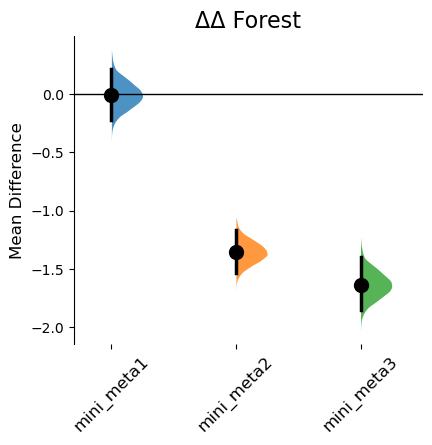

In [ ]:
forest_plot(contrasts_mini_meta, contrast_type='mini_meta', contrast_labels=['mini_meta1', 'mini_meta2', 'mini_meta3']);

### Horizontal Layout

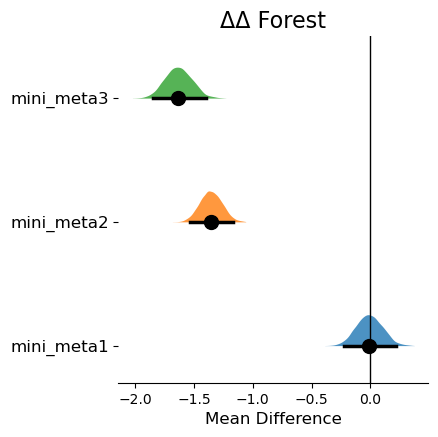

In [ ]:
forest_plot(contrasts_mini_meta, contrast_type='mini_meta', contrast_labels=['mini_meta1', 'mini_meta2', 'mini_meta3'], horizontal=True);


## Embedding forest plots into existing axes with the ``ax`` parameter


### Two forest plots plotted together in one figure

Text(0.5, 1.0, 'Mini-Meta Analysis')

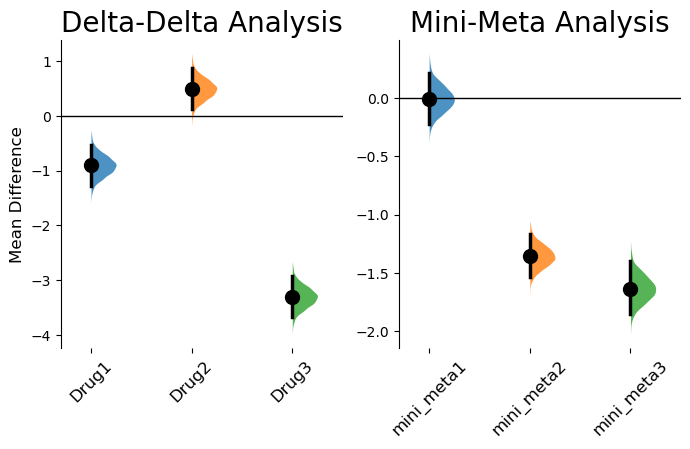

In [ ]:
f_forest_drug_profiles, axes  = plt.subplots(1, 2, figsize = [8, 4])
['Drug1', 'Drug2', 'Drug3']
forest_plot(contrasts, contrast_labels = ['Drug1', 'Drug2', 'Drug3'], ax = axes[0])
forest_plot(contrasts_mini_meta, contrast_type = "mini_meta", contrast_labels = ['mini_meta1', 'mini_meta2', 'mini_meta3'], ax = axes[1])
axes[0].set_title('Delta-Delta Analysis', fontsize = 20)
axes[1].set_ylabel('')
axes[1].set_title('Mini-Meta Analysis', fontsize = 20)
